<a href="https://colab.research.google.com/github/Renata-Romanelli/Challenge_Churn_rate/blob/main/Alura_Challenge_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alura Challenge - Data Science** 

Renata Romanelli 01/06/2022

E-mail: reromanelli.c@gmail.com

Github: https://github.com/Renata-Romanelli

## Week 2: Exploratory data analysis

In [ ]:
# Load clean data

import pandas as pd

df = pd.read_csv('https://github.com/Renata-Romanelli/Challenge_Data_Science/blob/main/AluraVoz_Client_data_clean%20(1).csv?raw=true')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges_daily,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,2.80,Yes,Mailed check,83.9,267.40


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'Charges_daily', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [ ]:
df.drop(df[df.Churn == 'No information'].index, inplace=True)

## Exploratory Data analysis with Pandas Profiling

In [ ]:
!pip install -U pandas-profiling

In [ ]:
!pip install MarkupSafe==2.0.1

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Target variable: Churn

> Churn is highly correlated with InternetService

> Contract is highly correlated with Churn

> OnlineSecurity is highly correlated with Churn

> TechSupport is highly correlated with Churn

In [ ]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


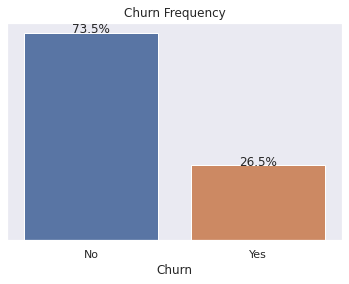

In [ ]:
Churn_frequency = df.Churn.value_counts(normalize=True)*100
print(Churn_frequency)

fig1 = sns.barplot(x=Churn_frequency.index, y=Churn_frequency.values)
fig1.set_ylabel('(%)')
fig1.set_xlabel('Churn')
fig1.set_title('Churn Frequency')
fig1.axes.get_yaxis().set_visible(False)

percentage = [Churn_frequency[0], Churn_frequency[1]]
patches = fig1.patches
for bar in range(len(patches)):
  x = patches[bar].get_x() + patches[bar].get_width()/2
  y = patches[bar].get_height() + .05
  fig1.annotate('{:.1f}%'.format(percentage[bar]), (x,y), ha='center')

### Churn vs. Senior Citizen

In [ ]:
Senior_frequency = df.SeniorCitizen.value_counts()
display(Senior_frequency)

crosstab_churn_senior = pd.crosstab(df.Churn, df.SeniorCitizen).reset_index()
crosstab_churn_senior.Yes = round((crosstab_churn_senior.Yes/crosstab_churn_senior.Yes.sum())*100,2)
crosstab_churn_senior.No = round((crosstab_churn_senior.No/crosstab_churn_senior.No.sum())*100,2)
print('Percentage:')
display(crosstab_churn_senior)

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

Percentage:


SeniorCitizen,Churn,No,Yes
0,No,76.39,58.32
1,Yes,23.61,41.68


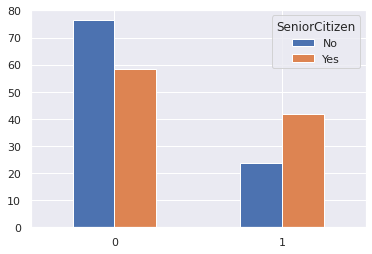

In [ ]:
barplot = crosstab_churn_senior.plot.bar(rot=0)

### Churn vs. Internet Service

In [ ]:
InternetService_frequency = df.InternetService.value_counts()
display(InternetService_frequency)

crosstab_churn_internet = pd.crosstab(df.Churn, df.InternetService).reset_index()
crosstab_churn_internet.DSL = round((crosstab_churn_internet.DSL/crosstab_churn_internet.DSL.sum())*100,2)
crosstab_churn_internet['Fiber optic'] = round((crosstab_churn_internet['Fiber optic']/crosstab_churn_internet['Fiber optic'].sum())*100,2)
crosstab_churn_internet.No = round((crosstab_churn_internet.No/crosstab_churn_internet.No.sum())*100,2)
print('Percentage:')
display(crosstab_churn_internet)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Percentage:


InternetService,Churn,DSL,Fiber optic,No
0,No,81.04,58.11,92.6
1,Yes,18.96,41.89,7.4


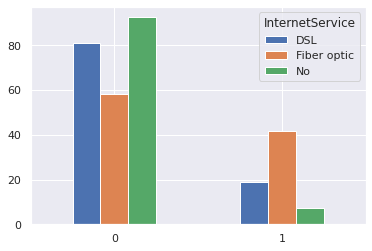

In [ ]:
barplot = crosstab_churn_internet.plot.bar(rot=0)

### Churn vs. Online Security

In [ ]:
OnlineSecurity_frequency = df.OnlineSecurity.value_counts()
display(OnlineSecurity_frequency)

crosstab_churn_OnlineSecurity = pd.crosstab(df.Churn, df.OnlineSecurity).reset_index()
crosstab_churn_OnlineSecurity['Yes'] = round((crosstab_churn_OnlineSecurity['Yes']/crosstab_churn_OnlineSecurity['Yes'].sum())*100,2)
crosstab_churn_OnlineSecurity['No'] = round((crosstab_churn_OnlineSecurity['No']/crosstab_churn_OnlineSecurity['No'].sum())*100,2)
crosstab_churn_OnlineSecurity['No internet service'] = round((crosstab_churn_OnlineSecurity['No internet service']/crosstab_churn_OnlineSecurity['No internet service'].sum())*100,2)
print('Percentage:')
display(crosstab_churn_OnlineSecurity)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Percentage:


OnlineSecurity,Churn,No,No internet service,Yes
0,No,58.23,92.6,85.39
1,Yes,41.77,7.4,14.61


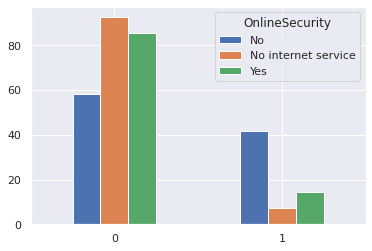

In [ ]:
barplot = crosstab_churn_OnlineSecurity.plot.bar(rot=0)

### Churn vs. Tech Support

In [ ]:
TechSupport_frequency = df.TechSupport.value_counts()
display(TechSupport_frequency)

crosstab_churn_TechSupport = pd.crosstab(df.Churn, df.TechSupport).reset_index()
crosstab_churn_TechSupport['Yes'] = round((crosstab_churn_TechSupport['Yes']/crosstab_churn_TechSupport['Yes'].sum())*100,2)
crosstab_churn_TechSupport['No'] = round((crosstab_churn_TechSupport['No']/crosstab_churn_TechSupport['No'].sum())*100,2)
crosstab_churn_TechSupport['No internet service'] = round((crosstab_churn_TechSupport['No internet service']/crosstab_churn_TechSupport['No internet service'].sum())*100,2)
print('Percentage:')
display(crosstab_churn_TechSupport)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

Percentage:


TechSupport,Churn,No,No internet service,Yes
0,No,58.36,92.6,84.83
1,Yes,41.64,7.4,15.17


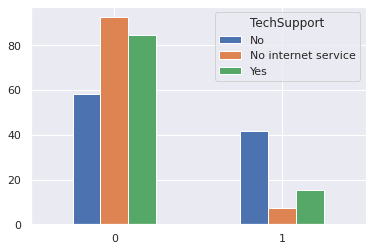

In [ ]:
barplot = crosstab_churn_TechSupport.plot.bar(rot=0)

### Churn vs. Tenure

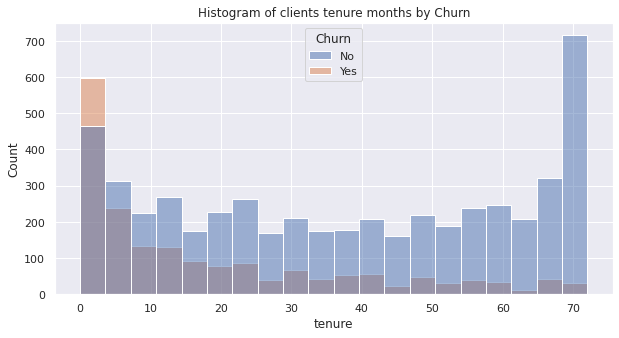

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.histplot(data=df, x='tenure', hue='Churn', bins=20).set(title='Histogram of clients tenure months by Churn')

# Hyphoteses

- Senior Citizen clients are more inlcined to leave the company.

- A great deal of clients that has 'Fiber Optic' as internet Service left the company. Fiber Optic internet is presenting functionality issues.

- The shorter the contract period, the higher is the churn rate. Clients who do not have a long term contract tend to have less commitment to the company. Likely due to a breach of contract fee.

- Cients that do not have online security has a higher Churn rate. Probably they have more problems with the internet service, due to its vounerabolity.

- Cients that do not have TechSupport has a higher Churn rate. Probably they have more problems unsolved with the internet service.

- Churn occurs most often in customers with little plan time, around 0 to 20 months of contract.